# Read Me (Introduction)

Coleeg version 5.0 (released in 1 July 2025)

<p><font color='red'>Ensure that your Google drive has sufficient space for dataset files:</font></p>
<ul>
  <li><font color='red'>Chbmit dataset: 8.4 GiB</font></li>
  <li><font color='red'>Physionet dataset: 1.9 GiB</font></li>
  <li><font color='red'>BcicomptIV2a dataset: 419.6 MiB</font></li>
</ul>



Data are stored inside ColeegData folder.

To connect to hosted (Online) runtime
* Press the arrow beside **Connect** and select **"Connect to a hosted runtime"**.

To connect to a local runtime on your machine:
* Press the arrow beside **Connect** and select **"Connect to a local runtime"**.
* Inside Coleeg folder located in your local machine home folder, run the command (bash Colab_Local)
* Copy the generated url then paste it in Colab and press connect.
* Local runtime was tested on Linux (Kubuntu 22.04)

<font color='green'>Please cite these publications if you use Coleeg in you publication:</font>
  * https://doi.org/10.1007/s11760-022-02293-1
  * https://doi.org/10.1007/s11760-022-02399-6

For support, don't hesitate to contact: malnaanah@gmail.com


# Initialization

In [1]:
%reset -f
import sys
import os
import importlib

# setting variables
coleeg_folder="Coleeg_6.0"
coleeg_data_folder="ColeegData"
time_zone='Asia/Amman'
INFO={} # dictionary for evaluation parameters and any information to be stored in info.json


# Uncomment for ubuntu 24.04 not allowing external python libraries
# !pip install  --break-system-packages --no-color mne==1.7.0 tensorflow==2.15.0 numpy==1.25.2




!pip install  --no-color mne==1.10.1 tensorflow==2.19.0 numpy==2.0.2 EMD-signal  wfdb scikit-learn

# if not 'google.colab' in sys.modules:  # Local runtime
#   # !pip install  --no-color mne==1.7.0 tensorflow==2.15.0 numpy==1.25.2 EMD-signal  wfdb
#   # !pip install  --upgrade --no-color mne tensorflow numpy EMD-signal wfdb
#   # !pip install --upgrade --force-reinstall mne tensorflow numpy EMD-signal wfdb
# else:
#   # !pip install  --upgrade --no-color mne tensorflow numpy EMD-signal wfdb






# Fixing "mne module not found"
if not 'google.colab' in sys.modules:  # Local runtime
  os.environ['PATH'] += f":{os.environ['HOME']}/.local/bin"


# If error occures due to the used version of numpy, uncommnt the following line
# Choose cancel if a warning message appear regrading prevously imported numpy module
# After finish runining "Initialization" script, choose Runtime> Restart session.
# Then run "Initialization" script again.
#
# !pip install --no-color numpy==1.25.2



import numpy as np
from importlib import reload


# detecting if Colab or local runtime is used
if 'google.colab' in sys.modules:  # Colab runtime
  from google.colab import drive
  # mounting Google drive
  drive.mount('/gdrive')
  root_folder=f'/gdrive/MyDrive'
else: # local runtime
  root_folder= f'{os.path.expanduser("~")}'


# Importing coleeg
sys.path.append(f'{root_folder}/{coleeg_folder}/code/')
from coleeg import *
set_time_zone(time_zone)
set_data_folder(f'{root_folder}/{coleeg_data_folder}')

# helping function for reloading coleeg
def reload_coleeg():
  import coleeg
  importlib.reload(coleeg)
  globals().update(coleeg.__dict__)

# disable line breaking when printing array objects
np.set_printoptions(linewidth=np.nan)

Defaulting to user installation because normal site-packages is not writeable


2025-10-27 11:33:59.001290: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 11:33:59.030538: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-27 11:33:59.257412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-27 11:33:59.457188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761554039.632676    3762 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761554039.68

# Show information about coleeg

In [ ]:
coleeg_version()

6.0


In [ ]:
coleeg_info()


* Coleeg is an open source initiative for collaborating on making a piece of software for investigating the use of Neural Networks in EEG signal classification on different datasets.

* License GPL V2.0

## Team:
Mahmoud Alnaanah (malnaanah@gmail.com)
Moutz Wahdow (m.wahdow@gmail.com)


## How to install Coleeg to your google drive

  1- Download Coleeg_5.0.zip and extract it.
  2- Copy Coleeg5.0 folder to the root of your google drive.
  3- Open RunColeeg_5.0.ipynb which is inside Coleeg5.0 folder.
  4- Grant permissions for the notebook to enable its access your google drive.
  5- The data needed for Coleeg will be located in the directory ColeegData in the root of your google drive.
  6- To use Colab online, choose Connect>Connect to a hosted runtime.
  7- To use your local machine, copy Coleeg4 folder to your home (i.e. personal) folder.
  Local runtime was tested in Linux (Kubuntu 22.04)
  8- Run Colab_local script using the command (bash Colab_Local) and copy the generated url.


In [ ]:
# To view available datasets and their sampling frequencies, and available models.
print(COLEEG.DATASETS)
print(COLEEG.Sample_Freqs)
print(COLEEG.MODELS)

['physionet', 'ttk', 'bcicomptIV2a', 'chbmit', 'mitbih']
{'physionet': 160, 'ttk': 500, 'bcicomptIV2a': 250, 'chbmit': 256, 'mitbih': 360}
['Basic', 'CNN1D', 'CNN1DZ', 'CNN1D_ECG', 'CNN1D_ECG_A', 'EEGNet', 'ShallowConvNet', 'DeepConvNet', 'CNN2D', 'CNN3D', 'TimeDist']


# Reload Coleeg (Run after modifying coleeg module)

In [ ]:
# # remounting gdrive
# drive.flush_and_unmount()
# drive.mount('/gdrive')

reload_coleeg()
set_data_folder(f'{root_folder}/{coleeg_data_folder}')
set_time_zone(time_zone)



# Importing data from original files

In [ ]:
# To view available datasets and their sampling frequencies
print(COLEEG.DATASETS)
print(COLEEG.Sample_Freqs)

['physionet', 'ttk', 'bcicomptIV2a', 'chbmit', 'mitbih']
{'physionet': 160, 'ttk': 500, 'bcicomptIV2a': 250, 'chbmit': 256, 'mitbih': 360}


In [ ]:
# selecting dataset
INFO['dataset'] = 'mitbih'
set_content_folder(INFO['dataset'])

In [ ]:
# downloading dataset files
start_time = time.time()
download_dataset(INFO['dataset'])
print(f'Time = {timedelta(seconds=round(time.time() - start_time))}')


✅ All records are downloaded.
Time = 0:00:01


In [ ]:
# Loading data
#====================== Options  ==============================
INFO['resample_freq'] = None # resample frequency in Hz (Set to None to deactivate)
INFO['resample_freq'] = 128 # resample frequency in Hz (Set to None to deactivate)

INFO['band_filters'] = None
# INFO['band_filters'] = [(2.0, 40.0)] # Uncomment this line to divide signals into bands
# INFO['band_filters'] = [(0.5, 8.0), (8.0, 13.0), (13.0, 40.0)] # Uncomment this line to divide signals into bands

# INFO['band_filters'] = [(0.5, 4.0), (4.0, 8.0), (8.0, 13.0), (13.0, 30.0),(30.0, 60.0)] # Uncomment this line to divide signals into bands



INFO['notch_freqs'] = None # frequency (or list of frequencies) to which a notch filter is applied, example INFO['notch_freqs'] = 50
INFO['tmin'] = 0.0
INFO['tmax'] = 2.0


# select tasks for Physionet dataset
# INFO['tasks'] = [[3,7,11],[5,9,13]] # Real movement
INFO['tasks']=[[4,8,12],[6,10,14]] # Uncommnet this line for imagined movement

# Parameters for Chbmit dataset
INFO['max_epoc'] = 30
INFO['spacing'] = 20
INFO['gap'] = INFO['max_epoc']*round(INFO['tmax']-INFO['tmin']) + INFO['spacing']

# Parameters for Mitbih dataset
INFO['beat_samples'] = 180 # number of samples (from the original raw signal) for each heart beat
INFO['beat_classes'] = [['N','L','R','e','j'],['A','a','J','S'],['V', 'E'],['F']]

# For all datasets
# INFO['exclude'] = [6,9,12,13,14,15,21] # exclude some subjects from chbmit dataset
INFO['exclude'] = None
#=============================================================================================
# set sampling frequency
if INFO['resample_freq'] is None:
  INFO['sampling_freq'] = COLEEG.Sample_Freqs[INFO['dataset']]
else:
  INFO['sampling_freq'] = INFO['resample_freq']


start_time = time.time()

# loading data
if INFO['dataset'] == 'bcicomptIV2a':
  import warnings
  warnings.filterwarnings("ignore", category=DeprecationWarning) # disable annoying error messages from python
  data_x, data_y, data_subject_index = get_data_bcicomptIV2a(resample_freq=INFO['resample_freq'], Exclude=np.array(INFO['exclude']), Bands=INFO['band_filters'], tmin=INFO['tmin'], tmax=(INFO['tmax']-1/INFO['sampling_freq']), Baseline=None)
elif INFO['dataset'] == 'physionet':
  data_x, data_y, data_subject_index = get_data_physionet(resample_freq=INFO['resample_freq'], Exclude=np.array(INFO['exclude']), Tasks=np.array(INFO['tasks']), Bands=INFO['band_filters'],  tmin=INFO['tmin'], tmax=(INFO['tmax']-1/INFO['sampling_freq']), Baseline=None, notch_freqs=INFO['notch_freqs'])
elif INFO['dataset'] == 'ttk':
  data_x, data_y, data_subject_index = get_data_ttk(resample_freq=INFO['resample_freq'], Exclude=np.array(INFO['exclude']), Bands=INFO['band_filters'], tmin=INFO['tmin'], tmax=(INFO['tmax']-1/INFO['sampling_freq']), Baseline=None)
elif INFO['dataset'] == 'chbmit':
  Subjects=list(range(1,25))
  data_x, data_y, data_subject_index = get_data_chbmit(Subjects=Subjects,Exclude=np.array(INFO['exclude']), resample_freq=INFO['resample_freq'], Bands=INFO['band_filters'], tmin=INFO['tmin'], tmax=INFO['tmax'], gap = INFO['gap'], max_epoc=INFO['max_epoc'], Baseline=None)
elif INFO['dataset'] == 'mitbih':
  data_x, data_y, data_subject_index = get_data_mitbih(INFO['beat_classes'],INFO['beat_samples'])
else:
  print('Wrong dataset')
INFO['bands'] = data_x.shape[-1]
print(f'\nTime = {timedelta(seconds=round(time.time() - start_time))}')


Loading record: 100
Loading record: 101
Loading record: 102
Loading record: 103
Loading record: 104
Loading record: 105
Loading record: 106
Loading record: 107
Loading record: 108
Loading record: 109
Loading record: 111
Loading record: 112
Loading record: 113
Loading record: 114
Loading record: 115
Loading record: 116
Loading record: 117
Loading record: 118
Loading record: 119
Loading record: 121
Loading record: 122
Loading record: 123
Loading record: 124
Loading record: 200
Loading record: 201
Loading record: 202
Loading record: 203
Loading record: 205
Loading record: 207
Loading record: 208
Loading record: 209
Loading record: 210
Loading record: 212
Loading record: 213
Loading record: 214
Loading record: 215
Loading record: 217
Loading record: 219
Loading record: 220
Loading record: 221
Loading record: 222
Loading record: 223
Loading record: 228
Loading record: 230
Loading record: 231
Loading record: 232
Loading record: 233
Loading record: 234

Time = 0:01:28


# Saving data to local storage

In [ ]:
# saving unprocessed datadata
save_data(data_x, data_y, data_subject_index, INFO)

Data saved in folder 20251022-041834


# Loading data from local storage

In [2]:
# loading data for MIT_BIH
folder='20251022-041834'
data_x, data_y, data_subject_index, INFO = load_data(folder)

# Data processing

In [ ]:
print(data_x.shape)
print(data_y.shape)
print(data_subject_index.shape)


(101426, 180, 1, 1)
(101426,)
(48, 2)


In [ ]:
# Show number of classes for each subject
show_classes(data_subject_index,data_y)


Subject 100 [0 1 2] [2237   33    1]
Subject 101 [0 1] [1859    3]
Subject 102 [0 2] [99  4]
Subject 103 [0 1] [2082    2]
Subject 104 [0 2] [163   2]
Subject 105 [0 2] [2526   41]
Subject 106 [0 2] [1507  520]
Subject 107 [2] [59]
Subject 108 [0 1 2 3] [1739    4   17    2]
Subject 109 [0 2 3] [2491   38    2]
Subject 111 [0 2] [2123    1]
Subject 112 [0 1] [2537    2]
Subject 113 [0 1] [1788    6]
Subject 114 [0 1 2 3] [1820   12   43    4]
Subject 115 [0] [1952]
Subject 116 [0 1 2] [2301    1  109]
Subject 117 [0 1] [1533    1]
Subject 118 [0 1 2] [2165   96   16]
Subject 119 [0 2] [1543  444]
Subject 121 [0 1 2] [1861    1    1]
Subject 122 [0] [2476]
Subject 123 [0 2] [1514    3]
Subject 124 [0 1 2 3] [1536   31   47    5]
Subject 200 [0 1 2 3] [1742   30  826    2]
Subject 201 [0 1 2 3] [1635  128  198    2]
Subject 202 [0 1 2 3] [2061   55   19    1]
Subject 203 [0 1 2 3] [2529    2  444    1]
Subject 205 [0 1 2 3] [2571    3   71   11]
Subject 207 [0 1 2] [1542  107  210]
Subje

In [ ]:
# #resampling_data
# old = INFO['resample_freq'] = 100
# new = COLEEG.Sample_Freqs[INFO['dataset']]
# data_x = resample_data(data_x,old,new)

In [ ]:
# Show some statistics about classes per subject
show_class_stats(data_subject_index,data_y)

Class     MIN       MAX       SUM       
0         99        3195      90608     
1         1         1382      2781      
2         1         992       7235      
3         1         372       802       

Total     1         3195      101426    


In [ ]:
# # class_max  = {0:200, 1:1500, 2:1500, 3:1500} # maximum number per class for each subject
# class_max = {0:200} # balance only for class 0
# data_x, data_y, data_subject_index = balance(data_x, data_y, data_subject_index,class_max)

Balancing data done.


In [3]:
# normalizing data (mean => 0, standard deviation => 1)
normalize(data_x)

Normalizing data done.


In [ ]:
print(data_x.mean())
print(data_x.std())

2.1661057e-07
1.0000004


In [ ]:
# # finding IMFs (Intrinsic Mode Functions) for Empirical Mode Decomposition (EMD)
# IMFS=5
# data_x = imfs(data_x,IMFS)
# normalize(data_x)

In [ ]:
# # finding dct
# data_x = dct_1d(data_x)

In [ ]:
# # finding fft
# data_x = fft_1d(data_x)

# Model Evaluation

In [ ]:
# Show available models
print(this.MODELS)

['Basic', 'CNN1D', 'CNN1DZ', 'ECG1D', 'ECG1DA', 'EEGNet', 'ShallowConvNet', 'DeepConvNet', 'CNN2D', 'CNN3D', 'TimeDist']


In [ ]:
#====================== Options ===========================
# Models to be included in evaluation
# INFO['model_list'] = ['ECG1D','ECG1DA'] # Example: ['Basic','CNN1D']
INFO['model_list'] = ['ECG1D',  'ECG1DA']

INFO['fold_num'] = 5 # number of folds to divide data into, testing ratio = 1/fold_num
# INFO['fold_num'] = data_subject_index.shape[0] # per-subject evaluations (align_to_subject should be True)
INFO['folds'] = range(INFO['fold_num']) # folds to include in validation, for kfold validation Folds = range(fold_num)
INFO['folds'] = [0] # uncomment to set folds manually, helpful to do single fold when validation takes long time and colab disconnect before finishing all folds.

INFO['epochs'] = 500 # number of training epochs

INFO['align_to_subject'] = False # (True/False) align fold boundary to subjects (necessery for cross validation)
INFO['shuffle'] = True # shuffle data before dividing into folds, has no effect if align_to_subject is true

INFO['batch_size']=128
# INFO['batch_size']=512 # as in ECG Paper
INFO['batch_norm'] = True # (True/False) Enable/Disable Batch normalization in the models: 'EEGNet', 'ShallowConvNet', 'DeepConvNet'. Notice that data already normalized
INFO['show_summary'] = False # (True/False) Show summery of the model
INFO['verbose'] = True # (True/False) show progress for each epoch
INFO['verbose'] = False # (True/False) show progress for each epoch
INFO['dropout_rate']=0.2 # dropout rate for the models: CNN1D, CNN2D, CNN3D, TimeDist, CNN1D_MFBF
# INFO['activation_name'] = 'sigmoid' # examples: 'relu', 'linear', 'tanh', 'sigmoid', 'softmax', 'selu', 'elu'
# so far 'sigmoid' gives the best results regading validation loss

INFO['play_audio'] = False # (True/False) play audio when evaluation finishes
# some parameters for models : 'Basic','CNN1D', 'CNN1DZ','CNN2D', 'CNN3D', 'TimeDist', 'CNN1D_MFBF',
INFO['max_norm'] = 3.0 # control kernel_constraint=max_norm(max_norm)
# INFO['loss_function'] = 'categorical_crossentropy' # comment to use binary_crossentropy (default value)
INFO['activation_name'] = 'relu'


INFO['selected_subjects']=None # None to deactivate
# # selecting specific subjects and adjusting folds according to selected subjects
# INFO['selected_subjects']=[1,2,3,4,5,  7,8,  10, 11,   16,17,18,19,20,   22,23,24] # uncomment to select only these subjects. Notice: Numbering starts at 1
# INFO['fold_num'] = len(INFO['selected_subjects']) # per-subject evaluations (align_to_subject should be True)
# INFO['folds'] = range(INFO['fold_num']) # folds to include in validation, for kfold validation Folds = range(fold_num)

INFO['selected_classes'] = None # None to deactivate
# INFO['selected_classes'] = [0,1] # uncomment to select only classes 0 and 1
INFO['selected_channels']=None # None to deactivate
INFO['selected_bands']=None
# INFO['selected_bands']=[0,1,2,3,4] # None to deactivate
#===========================================================
# if 'model' in locals():
#   del model
model = evaluate_model(data_x, data_y, data_subject_index,INFO)



Starting evaluation for ECG1D model at 12:40:05. Dataset: mitbih, Classes:[0, 1, 2, 3], Bands:1, Folds: [0]
Fold 0 - Class Weights: {0: 0.279, 1: 9.28, 2: 3.545, 3: 32.199}
Data saved
Fold 0 done in 0:00:57 
Data saved


# Plots

In [ ]:
print(COLEEG.DATASETS)
print(COLEEG.METRICS)

['physionet', 'ttk', 'bcicomptIV2a', 'chbmit', 'mitbih']
['training_loss', 'training_accuracy', 'validation_loss', 'validation_accuracy', 'validation_cohen_kappa', 'validation_specificity', 'validation_sensitivity']


## Line plots

In [ ]:
print(COLEEG.METRICS)

['training_loss', 'training_accuracy', 'validation_loss', 'validation_accuracy', 'validation_cohen_kappa', 'validation_specificity', 'validation_sensitivity']


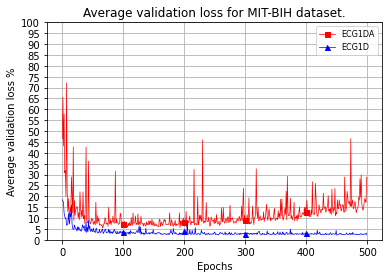

In [4]:
metrics=['validation_loss']# example: metrics=['validation_loss','validation_accuracy']
datasets=['mitbih'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform']
label_info=['model_type']
ylim=[0,100]
plot_line(datasets=datasets,metrics=metrics, ylim=ylim,save=True, label_info=label_info)

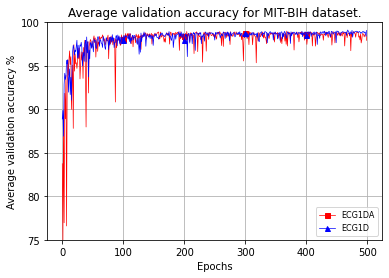

In [ ]:
metrics=['validation_accuracy']# example: metrics=['validation_loss','validation_accuracy']
datasets=['mitbih'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform']
label_info=['model_type']
ylim=[75,100]
plot_line(datasets=datasets,metrics=metrics, ylim=ylim,save=True, label_info=label_info)

## Bar plots

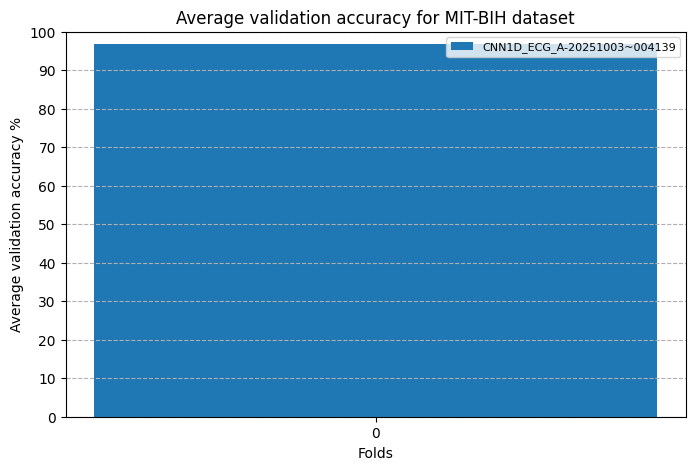

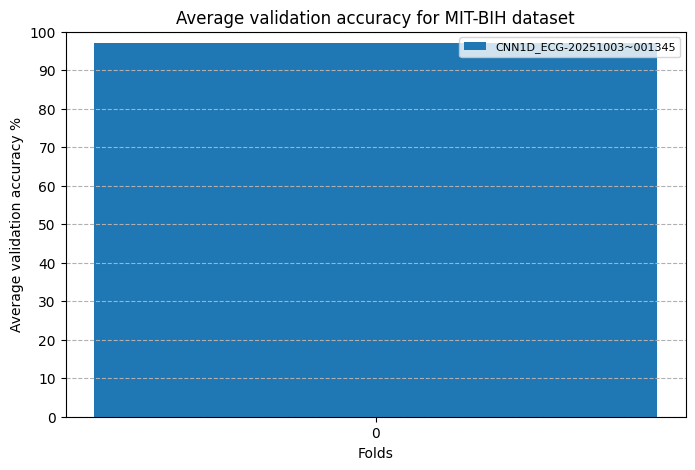

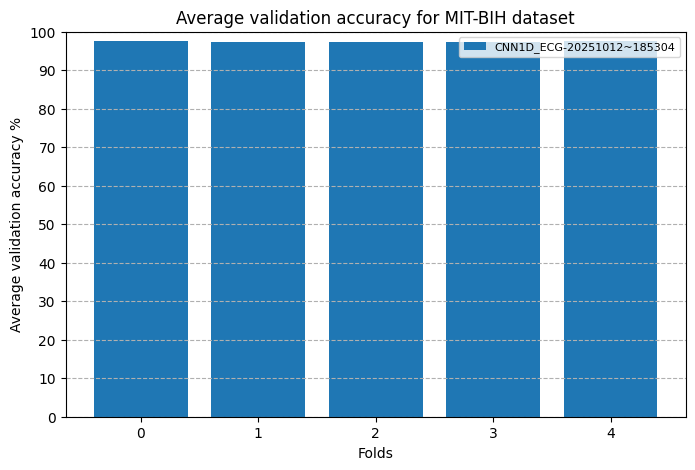

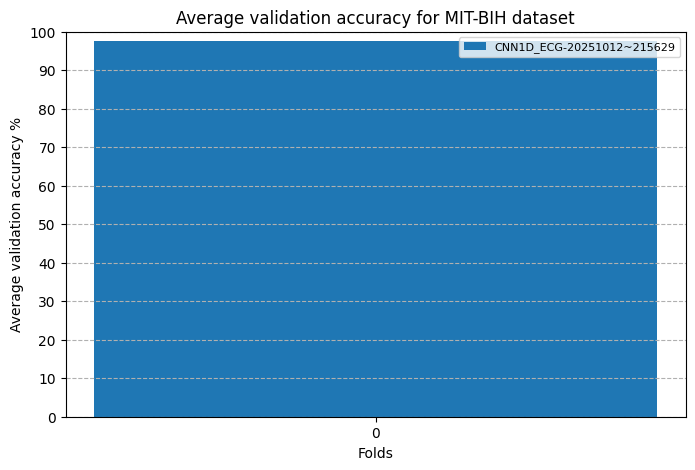

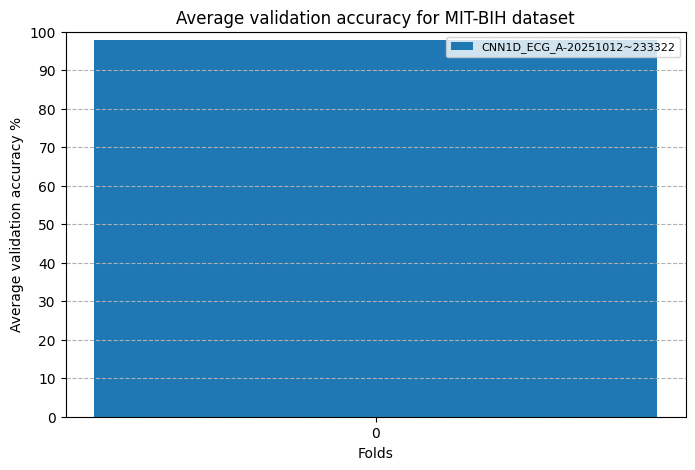

In [ ]:
# ploting metrics per subject as barplot
metrics=['validation_accuracy'] # example: metrics=['validation_loss','validation_accuracy']
datasets=['mitbih'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform']
label_info=['model_type', 'time_stamp']
ylim = [0,100]
y_spacing=10
plot_bar(datasets=datasets,metrics=metrics,save=True,ylim=ylim,y_spacing=y_spacing, label_info=label_info)

## Multibar plots (per class testing)

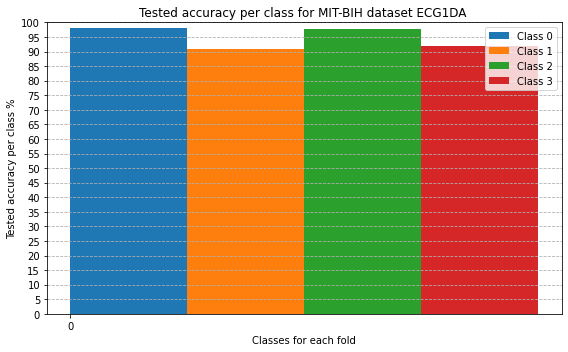

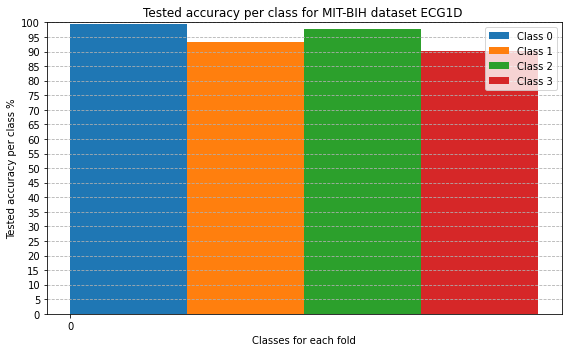

In [ ]:
datasets=['mitbih'] # example: datasets=['physionet', 'ttk', 'bcicomptIV2a']
label_info=['model_type']
plot_multibar(datasets=datasets,save=True, label_info=label_info)



## Signal (trial) Plot

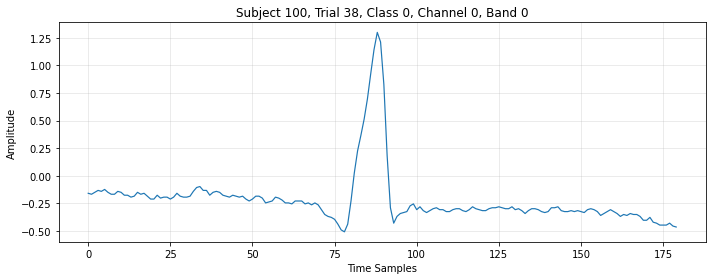

In [ ]:

plot_trial(data_x, data_y, data_subject_index,subject=100, trial="random", class_label=0, save=False)

# Displaying predicted class accuracy for each fold

In [ ]:
# Displaying predicted class accuracy for each fold
label_info=['model_type','selected_classses']
class_accuracy(save=False,label_info=label_info)

           mitbih          
****************************
----------------------------------------
ECG1DA
----------------------------------------
Folds    :    0
Average  : 94.7
Class 0  : 98.2
Class 1  : 90.9
Class 2  : 97.8
Class 3  : 91.9
----------------------------------------
ECG1D
----------------------------------------
Folds    :    0
Average  : 95.2
Class 0  : 99.4
Class 1  : 93.4
Class 2  : 97.9
Class 3  : 90.1


In [ ]:
fold_num = data_subject_index.shape[0] # uncomment for per-subject evaluations (align_to_subject should be True)
Folds = range(fold_num) # folds to include in validation, for kfold validation Folds = range(fold_num)

# Get average values for the last epochs

In [ ]:
print(COLEEG.METRICS)

['training_loss', 'training_accuracy', 'validation_loss', 'validation_accuracy', 'validation_cohen_kappa', 'validation_specificity', 'validation_sensitivity']


In [ ]:
metrics=['training_loss', 'training_accuracy', 'validation_loss', 'validation_accuracy', 'validation_cohen_kappa', 'validation_specificity', 'validation_sensitivity']
# label_info=['model_type','selected_classes','bands', 'selected_channels', 'transform','time_stamp']
label_info=['model_type']
average_results(metrics=metrics,epochs=50,save=False,label_info=label_info)

           mitbih          
****************************
-------- training_loss-----------
ECG1DA                        Mean(450-500) = 4.7
ECG1D                         Mean(450-500) = 0.9
-------- training_accuracy-----------
ECG1DA                        Mean(450-500) = 98.9
ECG1D                         Mean(450-500) = 99.3
-------- validation_loss-----------
ECG1DA                        Mean(450-500) = 17.7
ECG1D                         Mean(450-500) = 2.6
-------- validation_accuracy-----------
ECG1DA                        Mean(450-500) = 98.5
ECG1D                         Mean(450-500) = 98.8
-------- validation_cohen_kappa-----------
ECG1DA                        Mean(450-500) = 93.0
ECG1D                         Mean(450-500) = 94.5
-------- validation_specificity-----------
ECG1DA                        Mean(450-500) = 99.5
ECG1D                         Mean(450-500) = 99.6
-------- validation_sensitivity-----------
ECG1DA                        Mean(450-500) = 98.5
ECG1D 

# Total validation time for each model from saved files

In [ ]:
# label_info=['model_type','selected_classes','bands']
label_info=['model_type','time_stamp']
validation_time(save=False, label_info=label_info)

           mitbih          
****************************
ECG1DA-20251022~061158           01:17:55
ECG1D-20251022~045155            00:29:50


# Visualization (video array)

In [ ]:
# Generating 2D mapped data
pos_map = get_pos_map(INFO['dataset']) # positions for 2D map conversion
data_x2D = make_into_2d(data_x,pos_map)

In [ ]:
# Generating video array for random samples
video_array(data_x2D, data_y, Class=1, Band=0, Rows=1, Cols=1)

samples = [1048]
